<h1>Spaceship Titanic Competition</h1>

<h2>Import Dependencies</h2>

In [189]:
import numpy as np # linear algebra
import pandas as pd # data processing

<h2>Import Data</h2>

In [190]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
sub_df = pd.read_csv('./data/sample_submission.csv')

<h2>Quick Look at Data</h2>

In [191]:
# Look at the first entries
# Uncomment the dataframe you want to check

#train_df.head()
test_df.head()
#sub_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [192]:
# Description of the data
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [193]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [194]:
# Shapes of the dataframes
train_df.shape, test_df.shape, sub_df.shape

((8693, 14), (4277, 13), (4277, 2))

<h2>Data Simple Preparation</h2>

In [195]:
# Change the label from boolean to numeric (0 or 1)
train_df['Transported'] = train_df['Transported'].astype(int)
train_df['VIP'] = train_df['VIP'].apply(lambda x: 0 if x==False else (1 if x == True else np.nan))
train_df['CryoSleep'] = train_df['CryoSleep'].apply(lambda x: 0 if x == False else (1 if x == True else np.nan))

#test_df['Transported'] = train_df['Transported'].astype(int)
test_df['VIP'] = test_df['VIP'].apply(lambda x: 0 if x==False else (1 if x == True else np.nan))
test_df['CryoSleep'] = test_df['CryoSleep'].apply(lambda x: 0 if x == False else (1 if x == True else np.nan))

In [196]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,20.0,0.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [197]:
# Simple function to expose clearer the info about missing and uniqueness of entries in the data
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(train_df)

Dataset has 14 features and 8693 examples.


,Unique,Missing,Duplicated,Types
PassengerId,8693,0,0,object
HomePlanet,3,201,0,object
CryoSleep,2,217,0,float64
Cabin,6560,199,0,object
Destination,3,182,0,object
Age,80,179,0,float64
VIP,2,203,0,float64
RoomService,1273,181,0,float64
FoodCourt,1507,183,0,float64
ShoppingMall,1115,208,0,float64


<Axes: ylabel='Transported'>

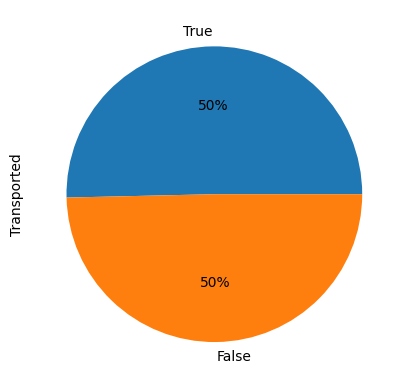

In [198]:
# Distribution of the labels in the training data
train_df.Transported.value_counts().plot(kind = 'pie', labels = ['True','False'], autopct='%.0f%%')

<h2>Data Visualization</h2>

After gathering the data and examining it broadly, let's visualize some of the features and their relation to the final label 

In [199]:
! pip install seaborn

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='HomePlanet', ylabel='count'>

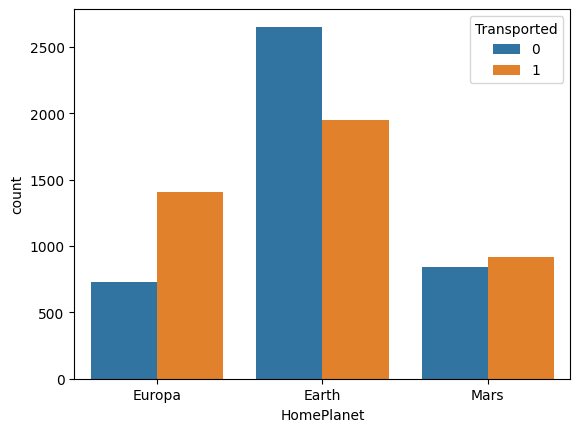

In [201]:
sns.countplot(data = train_df, x = 'HomePlanet', hue = 'Transported')

<h3>Insights</h3>
<ul>
    <li>Rate of transportation in Europa is way higher than the other 2</li>
    <li>Rate of transportation in Earth the lowest, and below 50%</li>
</ul>

<Axes: xlabel='Destination', ylabel='count'>

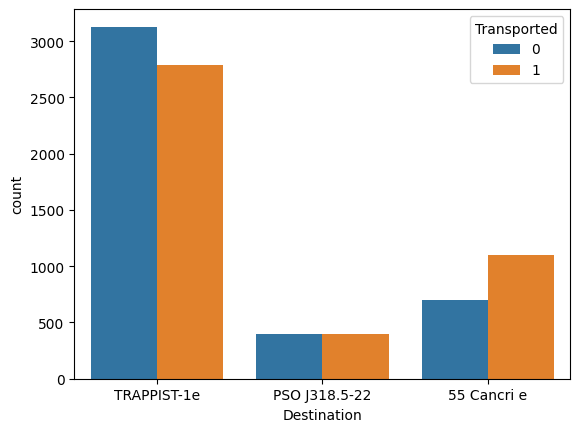

In [202]:
sns.countplot(data = train_df, x = 'Destination', hue = 'Transported')

<h3>Insights</h3>
<ul>
    <li>With "55 Cancri e" as a destination is the only one with a rate of transportation over 50%</li>
    <li>Not much more can be concluded from this graph</li>
</ul>

Let's now take a look the the combinations of Home Planet/Destination and the transportation information

In [203]:
pd.DataFrame(train_df.groupby(['HomePlanet','Destination','Transported']).size())

0
HomePlanet Destination   Transported      
Earth      55 Cancri e   0             342
                         1             348
           PSO J318.5-22 0             357
                         1             355
           TRAPPIST-1e   0            1894
                         1            1207
Europa     55 Cancri e   0             275
                         1             611
           PSO J318.5-22 0               5
                         1              14
           TRAPPIST-1e   0             434
                         1             755
Mars       55 Cancri e   0              75
                         1             118
           PSO J318.5-22 0              27
                         1              22
           TRAPPIST-1e   0             720
                         1             755

<h3>Insights</h3>
<ul>
    <li>It is possible to verify that highest number of travels are between Earth and TRAPPIST-1e</li>
    <li>It is possible to see that highest transportation rate travel is Europa->55 Cancri e (68.96%)</li>
</ul>

In [204]:
import plotly.express as px
# Box plot for the age distribition in both Transported and Non-Transported labeles examples
px.box(train_df, x = 'Transported', y = 'Age')

<h3>Insights</h3>
<ul>
    <li>Similar age distributions for Transported and Non-Transported</li>
    <li>No relation between age and label. Maybe in some other way, like age block, age data can be relevant</li>
</ul>

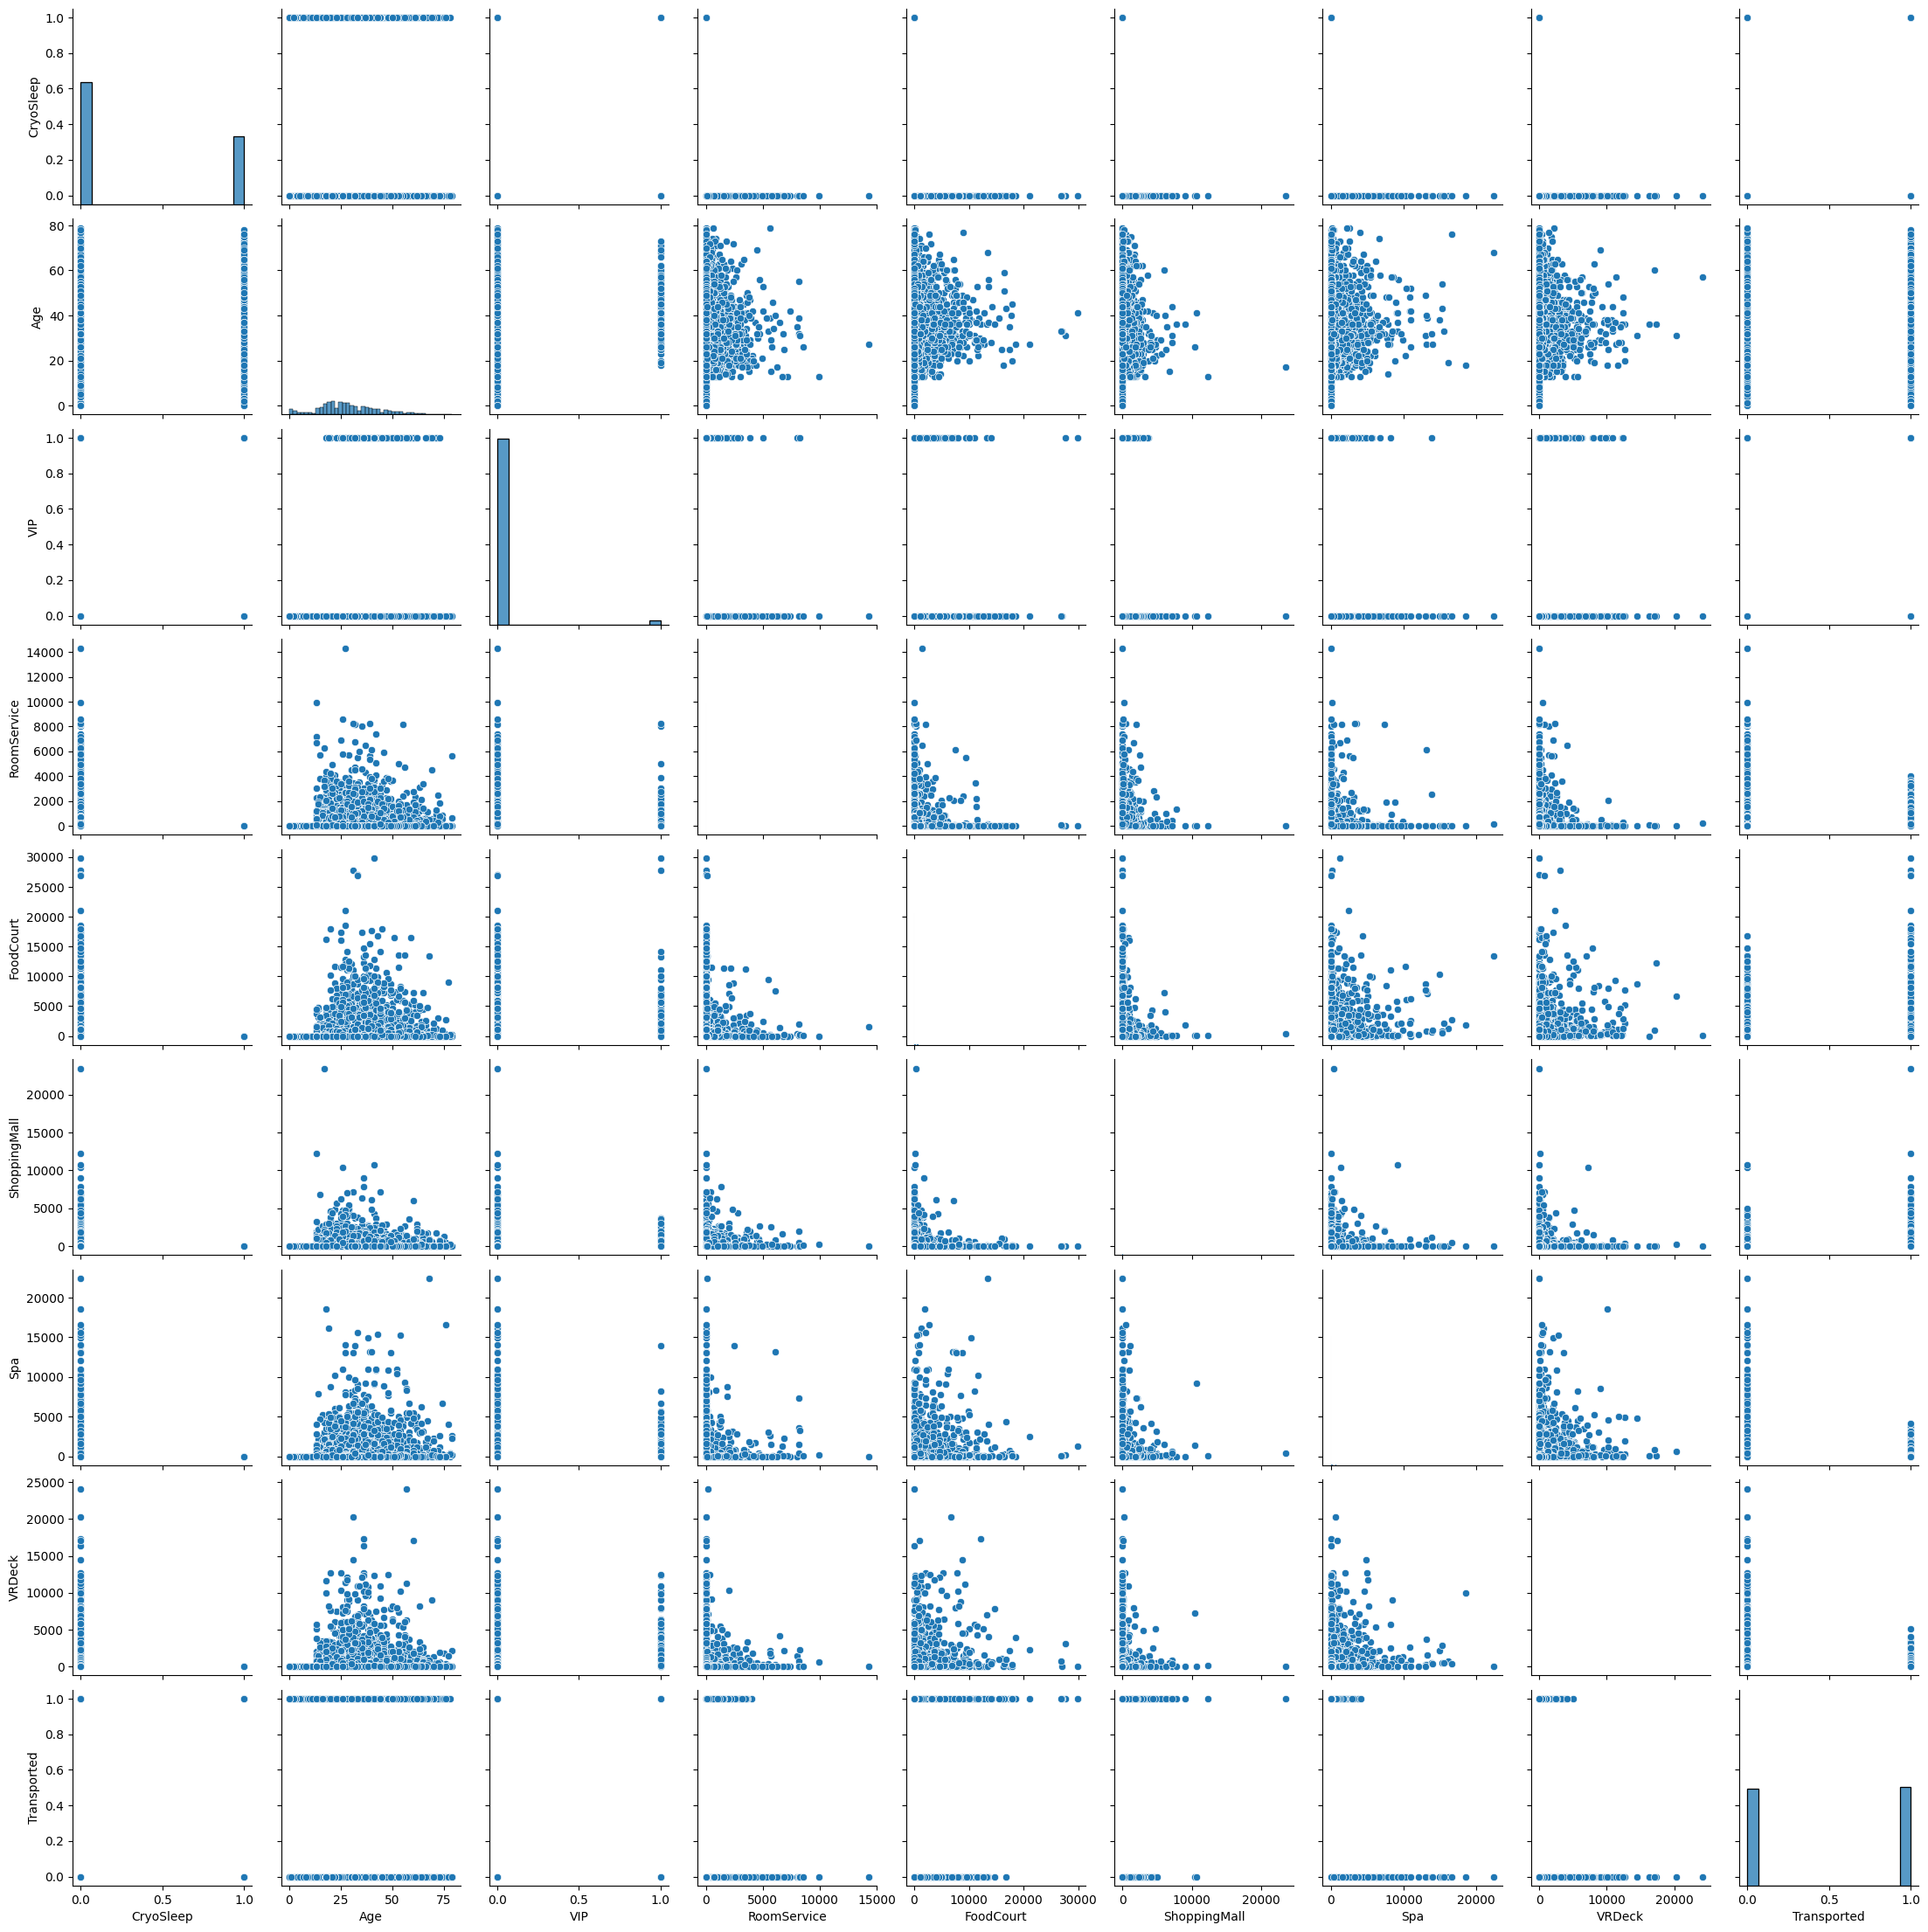

In [205]:
# Data visualization 
numeric_cols = train_df.select_dtypes(include = 'number').columns.tolist()
sns.pairplot(train_df[numeric_cols])

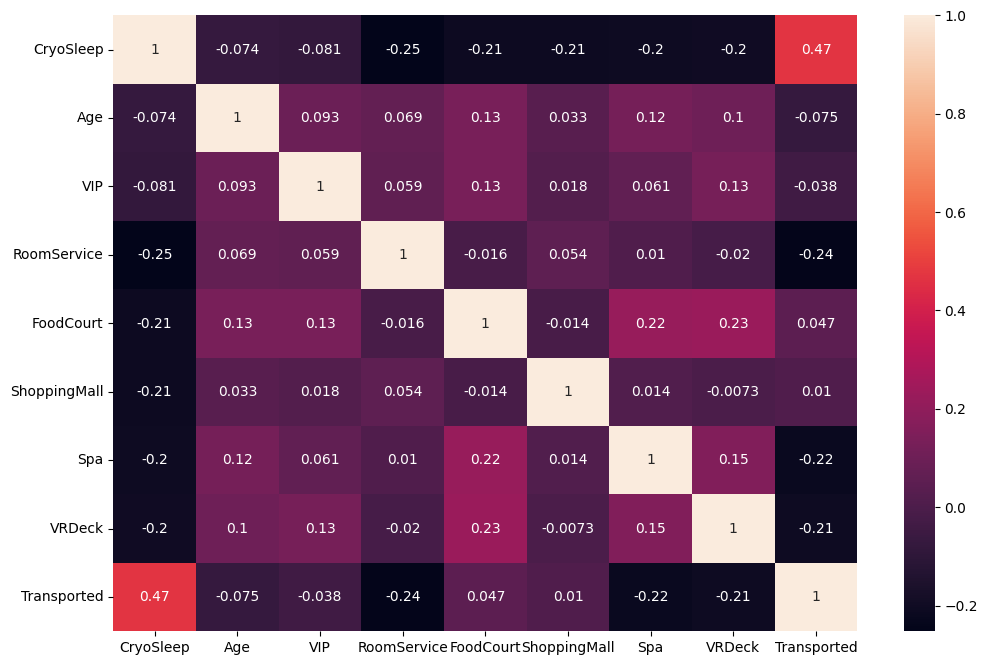

In [206]:
# Correlation between features in dataset
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

<h3>Insights</h3>
<ul>
    <li>Possible to see that those that spent more on food had an higher count on Transported</li>
    <li>Possible to see that those that spent more in VRDeck and Spa had an lower count on Transportedr</li>
</ul>

In [207]:
pivot = pd.pivot_table(train_df, values = 'Transported', index=['VIP','CryoSleep'], columns=train_df['Transported'], aggfunc=len)
pivot = pd.pivot_table(train_df, values = 'Transported', index=['CryoSleep','VIP'], columns=train_df['Transported'], aggfunc=len)
pivot
#pd.DataFrame(train_df.groupby(['VIP','CryoSleep','Transported']).size())

Transported         0       1
CryoSleep VIP                
0.0       0.0  3455.0  1688.0
          1.0   121.0    54.0
1.0       0.0   535.0  2406.0
          1.0     NaN    21.0

<h3>Insights</h3>
<ul>
    <li>When the VIP and CrySleep usage is combined, the label is always Transported.</li>
    <li>Much more examples where neither VIP or CryoSleep were used. Low VIPs.</li>
    <li>Being VIP doesn't easily transpose into Transported label, if anything it may lower the chances.</li>
    <li>Looks like CryoSleep usage has greater effect into the label being Transported. Probably good column of the dataset.</li>
</ul>

<Axes: xlabel='Transported', ylabel='CryoSleep'>

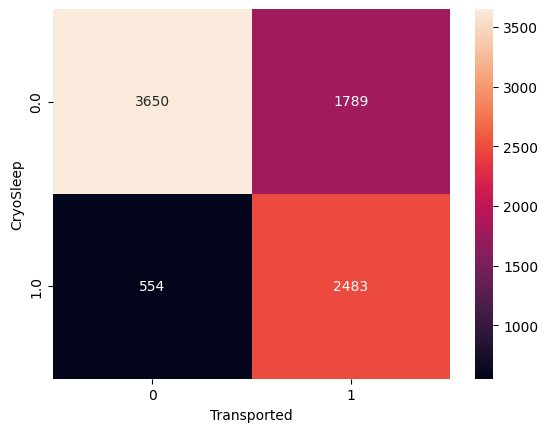

In [208]:
# Additional data visualization to prove that CryoSleep is a good column in the dataset
pivot1 = pd.pivot_table(train_df, values = 'Transported', index=['CryoSleep'], columns=train_df['Transported'], aggfunc=len)
sns.heatmap(pivot1, annot = True, cbar = True, fmt = "d")

<h3>Insights</h3>
<ul>
    <li>Clearly, it is possible to see that when CryoSleep is used, the chances of being transported increase.</li>
    <li>Of those were transported, around 58% were in CryoSleep. Of those that used CryoSleep, around 80% were Transported.</li>
</ul>

<h2>One-hot the categorical features</h2>

In [209]:
X = pd.get_dummies(train_df.drop('Name Cabin PassengerId'.split(), axis=1))
X_test = pd.get_dummies(test_df.drop('Name Cabin PassengerId'.split(), axis=1))
X.shape, X_test.shape

((8693, 15), (4277, 14))

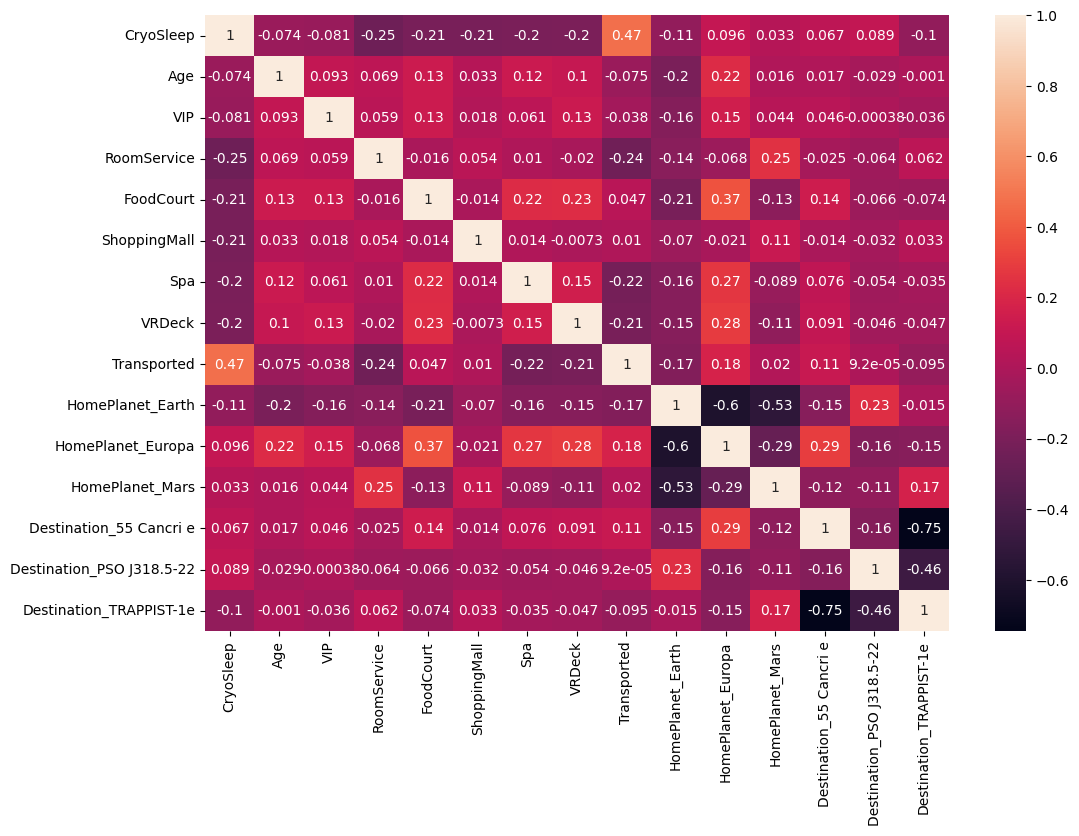

In [210]:
# Correlation between features in dataset after one-hot encoding categorical features
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True)
plt.show()

<h2>Train Model</h2>

Let's try a simple XGBClassifier classification model!
We won't be doing any kind of feature engineeering in this example

In [211]:
# Import libraries for the 
! pip install xgboost
! pip install scikit-learn

from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split

In [212]:
# Classification Model
model = xgboost.XGBClassifier()

In [213]:
#Simple imputation to deal with NA values
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X = pd.DataFrame(my_imputer.fit_transform(X))

# Imputation removed column names; put them back
imputed_X.columns = X.columns


In [214]:
# Data split between train and validation
X_train, X_valid, y_train, y_valid = train_test_split(imputed_X.drop('Transported', axis=1), X[['Transported']], test_size=0.2, stratify=imputed_X[['Transported']])

In [215]:
# Fit Model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [216]:
# Predictions
res = model.predict(X_test)

In [217]:
# Prediction visualization
pd.DataFrame(res).value_counts()

1    2292
0    1985
dtype: int64

In [218]:
predict = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Transported':res})
df = predict.astype({"Transported": bool})
df.to_csv("./predictions/predictions.csv", index=False)